In [3]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_training_testing_boxplots(train_errors_1, test_errors_1, 
                                   train_errors_2, test_errors_2, 
                                   train_errors_3, test_errors_3):
    """
    Plots boxplots of training and testing errors for 3 methods in two panels.

    Parameters:
    - train_errors_1, test_errors_1: Errors for method 1 (arrays or lists)
    - train_errors_2, test_errors_2: Errors for method 2 (arrays or lists)
    - train_errors_3, test_errors_3: Errors for method 3 (arrays or lists)
    """

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Combine data for the boxplots
    train_errors = [train_errors_1, train_errors_2, train_errors_3]
    test_errors = [test_errors_1, test_errors_2, test_errors_3]

    # Plot training errors in the first panel
    ax1.boxplot(train_errors, tick_labels=['Unpruned', 'Pruned', 'Naive'])
    ax1.set_title('Training Errors')
    ax1.set_xlabel('Method')
    ax1.set_ylabel('Error')

    # Plot testing errors in the second panel
    ax2.boxplot(test_errors, tick_labels=['Unpruned', 'Pruned', 'Naive'])
    ax2.set_title('Testing Errors')
    ax2.set_xlabel('Method')
    ax2.set_ylabel('Error')

    # Display the plots
    plt.tight_layout()
    plt.show()

In [5]:
import seaborn as sns
import pandas as pd
def plot_training_testing_pointplots(train_errors_1, test_errors_1, 
                                     train_errors_2, test_errors_2, 
                                     train_errors_3, test_errors_3):
    """
    Plots pointplots of training and testing errors for 3 methods in two panels.

    Parameters:
    - train_errors_1, test_errors_1: Errors for method 1 (arrays or lists)
    - train_errors_2, test_errors_2: Errors for method 2 (arrays or lists)
    - train_errors_3, test_errors_3: Errors for method 3 (arrays or lists)
    """
    
    # Prepare data for the pointplots
    methods = ['Unpruned'] * len(train_errors_1) + ['Pruned'] * len(train_errors_2) + ['Naive'] * len(train_errors_3)
    errors_train = train_errors_1 + train_errors_2 + train_errors_3
    errors_test = test_errors_1 + test_errors_2 + test_errors_3
    data_train = pd.DataFrame({'Method': methods, 'Error': errors_train, 'Type': 'Training'})
    data_test = pd.DataFrame({'Method': methods, 'Error': errors_test, 'Type': 'Testing'})
    data = pd.concat([data_train, data_test])

    # Create a figure with two pointplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot training errors in the first panel
    sns.pointplot(x='Method', y='Error', data=data_train, ax=ax[0])
    ax[0].set_title('Training Errors')
    ax[0].set_xlabel('Method')
    ax[0].set_ylabel('Error')

    # Plot testing errors in the second panel
    sns.pointplot(x='Method', y='Error', data=data_test, ax=ax[1])
    ax[1].set_title('Testing Errors')
    ax[1].set_xlabel('Method')
    ax[1].set_ylabel('Error')

    # Display the plots
    plt.tight_layout()
    plt.show()

In [6]:
#base_dir = 'root/n50_y1_o2/'
#base_dir = '/Users/yilingh/Desktop/PhD/Selective Inference/SI_Trees/Simulation/y3o1/'
base_dir = '/Users/yilingh/Desktop/PhD/Selective Inference/SI_Trees/Simulation/pruning/'
dir_list = [base_dir + "pruning_n50p5y1.5o0.5_" + str(i*50) + "_" + str(i*50 + 50) + ".pkl" for i in range(10)]

In [13]:
unpruned_RMSE_test = []
pruned_RMSE_test = []
mean_RMSE_test = []
unpruned_RMSE_train = []
pruned_RMSE_train = []
mean_RMSE_train = []

In [14]:
for d in dir_list:
    (unpruned_RMSE_train_i, pruned_RMSE_train_i, mean_RMSE_train_i,
     unpruned_RMSE_test_i, pruned_RMSE_test_i, mean_RMSE_test_i) = (joblib.load(d))
    unpruned_RMSE_test += unpruned_RMSE_train_i
    pruned_RMSE_test += pruned_RMSE_test_i
    mean_RMSE_test += mean_RMSE_test_i
    unpruned_RMSE_train += unpruned_RMSE_train_i
    pruned_RMSE_train += pruned_RMSE_train_i
    mean_RMSE_train += mean_RMSE_train_i

In [15]:
len(unpruned_RMSE_train)

500

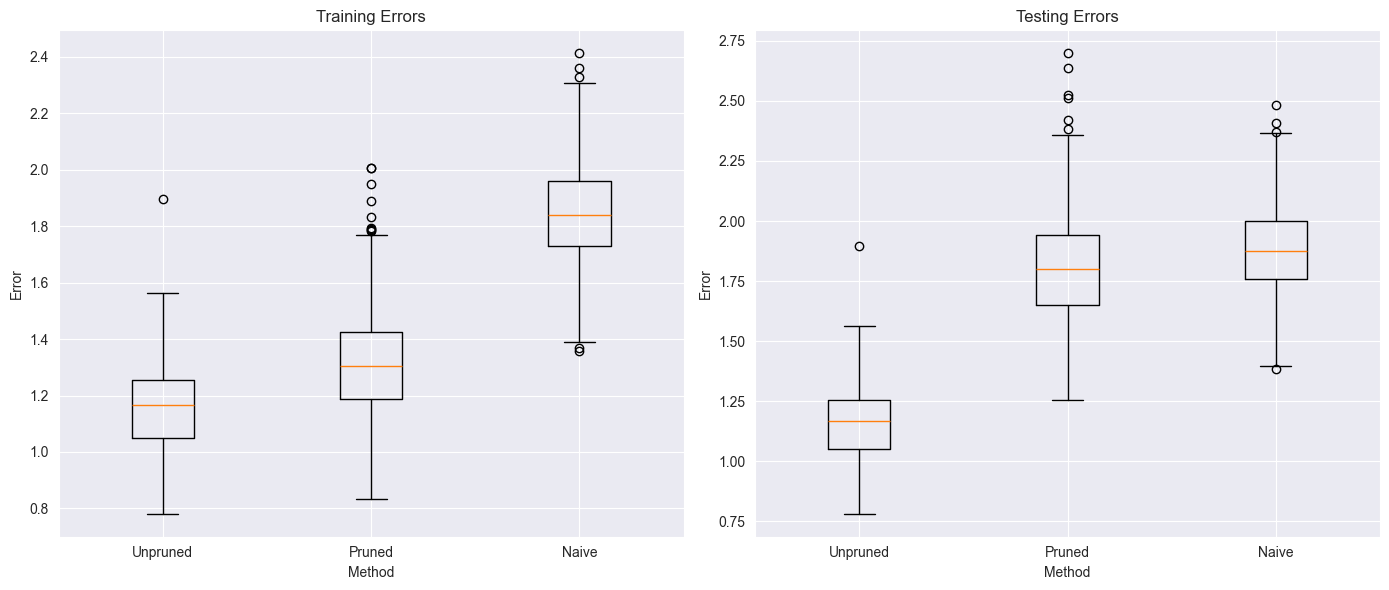

In [16]:
plot_training_testing_boxplots(unpruned_RMSE_train, unpruned_RMSE_test, 
                             pruned_RMSE_train, pruned_RMSE_test, 
                             mean_RMSE_train, mean_RMSE_test)

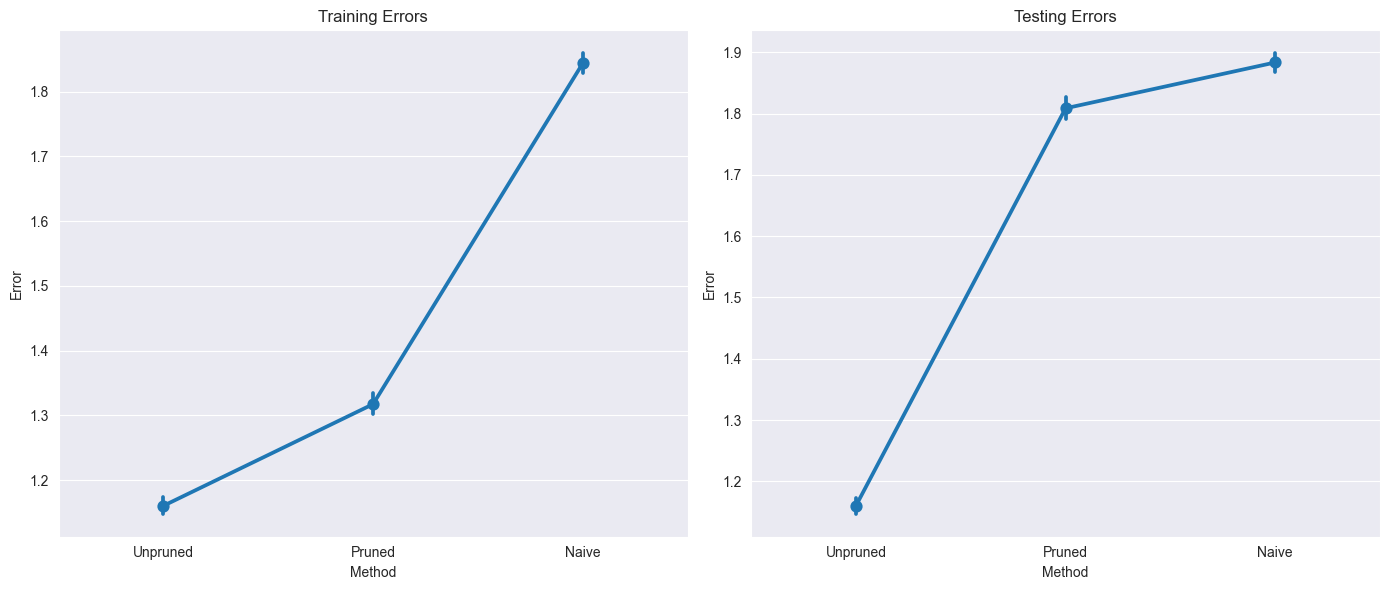

In [17]:
plot_training_testing_pointplots(unpruned_RMSE_train, unpruned_RMSE_test, 
                             pruned_RMSE_train, pruned_RMSE_test, 
                             mean_RMSE_train, mean_RMSE_test)